<a href="https://colab.research.google.com/github/imabhinav-singh/CS360/blob/master/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

Synthetic data generation and simple curve fitting

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import random
import math

def generate_data(SIZE=10):
  
  X = np.random.uniform(0, 1, SIZE)
  noise = np.random.normal(0, 0.3, SIZE)
  Y = np.sin(2 * np.pi * X) + noise

  return (X, Y)

def split_data(X, Y, test_size=0.2):
  return train_test_split(X, Y, test_size=0.2, random_state=0)


def train(x_train, y_train, ITERATIONS=5000, LEARNING_RATE=0.05, display=True):

  estimated_W = []

  for deg in range(1, 10):
    if display:
      print("\nDegree: "+str(deg))
    W = np.random.uniform(0, 1, deg + 1)

    phi_x = np.transpose(np.asarray([x_train**i for i in range(deg+1)]))
    for i in range(ITERATIONS):
      W -= LEARNING_RATE*np.mean(np.sum(W*phi_x, axis=1) - y_train)
      
      if display:
        print("Cost at iter "+str(i)+"/"+str(ITERATIONS)+": "+str(calc_error(x_train, y_train, W, deg)), end="\r")
        
    estimated_W.append(W)

  return estimated_W

def calc_error(X, Y, W, deg):
  phi_x = np.transpose(np.asarray([X**i for i in range(deg+1)]))
  return 0.5*np.mean((np.sum(W*phi_x, axis=1) - Y)**2)


X, Y = generate_data()
x_train, x_test, y_train, y_test = split_data(X, Y)

W = train(x_train, y_train)

test_error = [calc_error(x_test, y_test, W[i], i+1) for i in range(9)]
print("Test error is: ", test_error)


Degree: 1
Cost at iter 4999/5000: 0.41833054900545835
Degree: 2
Cost at iter 4999/5000: 0.4497272533355069
Degree: 3
Cost at iter 4999/5000: 0.5616154724822283
Degree: 4
Cost at iter 4999/5000: 0.6265232066419872
Degree: 5
Cost at iter 4999/5000: 0.6525623855640018
Degree: 6
Cost at iter 4999/5000: 0.34588540931103323
Degree: 7
Cost at iter 4999/5000: 0.3573272332588593
Degree: 8
Cost at iter 4999/5000: 0.9281612983983776
Degree: 9
Test error is:  [0.04108154442105509, 0.03437011069634071, 0.040954359611273916, 0.03336059446819774, 0.040272039427665454, 0.03158888150672124, 0.038355832416531024, 0.07386588121673705, 0.05628196048639611]


Visualization of the dataset and the fitted curves

Text(0.5, 0.98, 'Dataset and estimated curves')

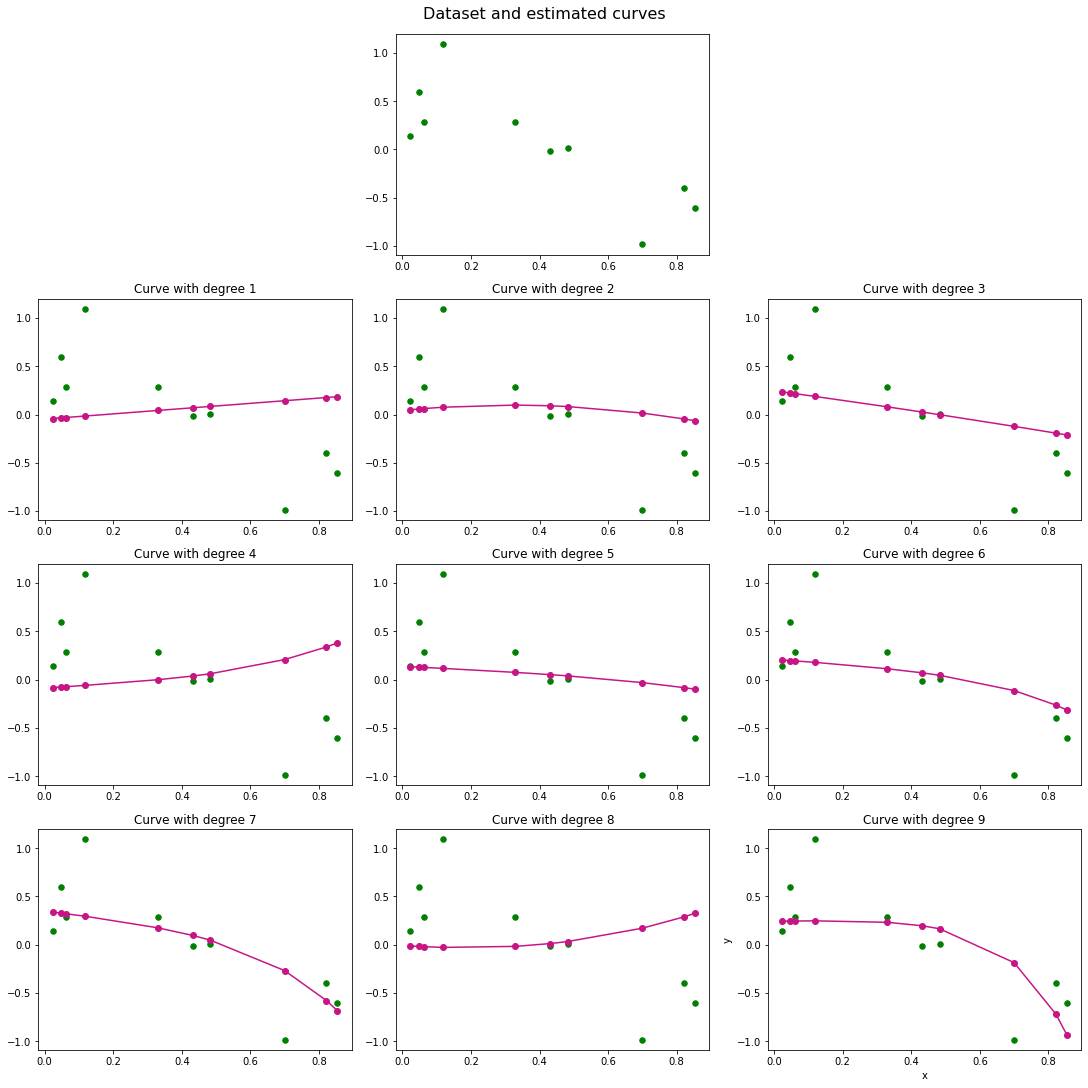

In [ ]:
import matplotlib.pyplot as plt  
import pandas as pd

def plot_regression_line(x, y, axes, i, j, W=None): 
    axes[i, j].scatter(x, y, color = "green", marker = "o", s = 30) 
    if W is not None:
      deg = len(W) - 1
      phi_x = np.transpose(np.asarray([x**i for i in range(deg+1)]))
      y_pred = np.sum(W*phi_x, axis=1)

      plot_data = np.vstack((x, y_pred))
      plot_data = plot_data[:, np.argsort(plot_data[0])]

      axes[i, j].plot(plot_data[0], plot_data[1], marker='o', color='mediumvioletred')  
      axes[i, j].set_title('Curve with degree '+str(deg))
    plt.xlabel('x') 
    plt.ylabel('y') 



figure, axes = plt.subplots(4, 3, figsize=(15,15), constrained_layout=True)

plot_regression_line(X, Y, axes, 0, 1)
i, j = 1, 0
for deg in range(1, 10):
  plot_regression_line(X, Y, axes, i, j, W[deg-1])
  j = (j+1)%3
  i = i+1 if j == 0 else i

axes[0, 0].axis('off')
axes[0, 2].axis('off')
figure.suptitle('Dataset and estimated curves', fontsize=16)

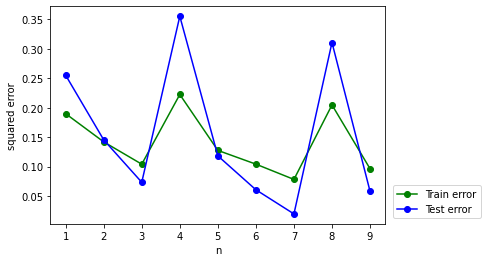

In [ ]:
deg = np.arange(1, 10)
train_error = [calc_error(x_train, y_train, W[i], i+1) for i in range(9)]
test_error = [calc_error(x_test, y_test, W[i], i+1) for i in range(9)]

plt.plot(deg, train_error, marker='o', color='green', label='Train error')
plt.plot(deg, test_error, marker='o', color='blue', label='Test error')
plt.xlabel('n')
plt.ylabel('squared error')
plt.legend(bbox_to_anchor=(1.3, 0.2))
plt.show()

 Experimenting with larger training set 

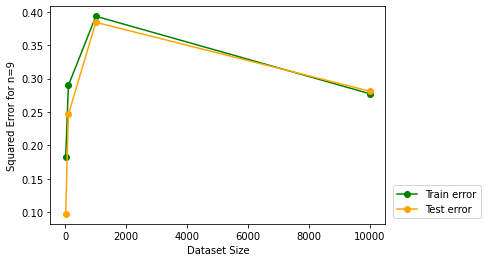

In [55]:
data_size = [10, 100, 1000, 10000]
train_error = []
test_error = []

for size in data_size:
  print("Size: "+str(size), end="\r")
  X, Y = generate_data(size)
  x_train, x_test, y_train, y_test = split_data(X, Y)

  W = train(x_train, y_train, display=False)

  train_error.append(calc_error(x_train, y_train, W[8], 9))
  test_error.append(calc_error(x_test, y_test, W[8], 9))

plt.plot(data_size, train_error, marker='o', color='green', label='Train error')
plt.plot(data_size, test_error, marker='o', color='orange', label='Test error')
plt.xlabel('Dataset Size')
plt.ylabel('Squared Error for n=9')
plt.legend(bbox_to_anchor=(1.3, 0.2))
plt.show()

#Logistic Regression
using breast cancer dataset

In [94]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
from IPython.display import display

def estimate_coef(x, y, k, learning_rate=0.0001):
  iterations = 1000
  
  b = np.random.rand(k)
    
  for i in range(iterations):
    temp_b = b
    #print(1/(1+np.exp(-np.sum(x*temp_b, axis=1))))
    for j in range(k):
      b[j] = b[j] - learning_rate*np.mean(((1/(1+np.exp(-np.sum(x*temp_b, axis=1)))) - y)*x[:, j])

  return b

def calc_MRE(x, y, b):
  y_pred_temp = 1/(1+np.exp(-np.sum(x*b, axis=1)))
  y_pred = [1 if y_pred_temp[i] >= 0.5 else 0 for i in range(len(y_pred_temp))]
  error = [1 if y_pred[i] != y[i] else 0 for i in range(len(y_pred))]
  return np.mean(error)


breast_cancer = datasets.load_breast_cancer(return_X_y=False)
k = np.size(breast_cancer['feature_names']) + 1
X, Y = breast_cancer['data'], breast_cancer['target']
X = np.column_stack(([1 for i in range(X.shape[0])], X))

dtset_dict = dict()
dtset_dict['Amount of randomly selected training data in %'] = [10, 20, 30, 40, 50, 60]
dtset_dict['Training accuracy in %'] = []
dtset_dict['Testing accuracy in %'] = []

for i in range(6):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.9 - i*0.1, random_state=0)
  b = estimate_coef(x_train, y_train, k)
  dtset_dict['Training accuracy in %'].append(round(100 - calc_MRE(x_train, y_train, b)*100, 2))
  dtset_dict['Testing accuracy in %'].append(round(100 - calc_MRE(x_test, y_test, b)*100, 2))

dtset = pd.DataFrame(dtset_dict, index=[1,2,3,4,5,6])
display(dtset)
dtset.to_csv('Train_Test_accuracy_comp.csv')

,Amount of randomly selected training data in %,Training accuracy in %,Testing accuracy in %
1,10,85.71,85.58
2,20,86.73,87.50
3,30,86.47,86.72
4,40,86.34,88.01
5,50,88.03,88.07
6,60,87.98,91.23
